In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cars_df = pd.read_csv('../dataset/car_prices.csv')

In [3]:
cars_df.head()

,brand,year,mileage,price,fee per month
0,CHERY,2014,78876,59900.0,1139.0
1,KIA,2010,125000,69900.0,1330.0
2,TOYOTA,2008,112585,79890.0,1520.0
3,CHEVROLET,2010,155000,79900.0,1520.0
4,NISSAN,2011,90010,79900.0,1520.0


In [4]:
cars_df.isnull().sum()

brand            0
year             0
mileage          0
price            0
fee per month    0
dtype: int64

In [5]:
cars_sorted = cars_df.sort_values('brand')
cars_sorted

,brand,year,mileage,price,fee per month
149,ALFA,2011,119000,125000.0,2378.0
519,AUDI,2013,140000,169900.0,3232.0
305,AUDI,2014,92300,145995.0,2777.0
577,AUDI,2013,101400,174800.0,3325.0
116,AUDI,2008,170000,119900.0,2281.0
...,...,...,...,...,...
545,VOLKSWAGEN,2019,40235,169900.0,3232.0
697,VOLKSWAGEN,2019,2259,183900.0,3498.0
42,VOLVO,2005,195000,99900.0,1900.0
71,VOLVO,2010,155000,108700.0,2068.0


In [6]:
cars_sorted.describe(include='all')

,brand,year,mileage,price,fee per month
count,698,698.000000,698.000000,698.000000,698.000000
unique,31,NaN,NaN,NaN,NaN
top,VOLKSWAGEN,NaN,NaN,NaN,NaN
freq,123,NaN,NaN,NaN,NaN
mean,NaN,2016.416905,57298.991404,147157.763610,2799.402579
std,NaN,2.767323,50377.424578,25796.828365,490.722867
min,NaN,2001.000000,1.000000,59900.000000,1139.000000
25%,NaN,2015.000000,14693.500000,129900.000000,2471.000000
50%,NaN,2017.000000,45000.000000,149950.000000,2853.000000
75%,NaN,2019.000000,90000.000000,169900.000000,3232.000000


In [7]:
cars_df.mileage

car2 = []

for car in cars_df.mileage:
    car2.append(int(car))
    
cars_df.mileage = car2
cars_df.describe(include='all')

,brand,year,mileage,price,fee per month
count,698,698.000000,698.000000,698.000000,698.000000
unique,31,NaN,NaN,NaN,NaN
top,VOLKSWAGEN,NaN,NaN,NaN,NaN
freq,123,NaN,NaN,NaN,NaN
mean,NaN,2016.416905,57298.991404,147157.763610,2799.402579
std,NaN,2.767323,50377.424578,25796.828365,490.722867
min,NaN,2001.000000,1.000000,59900.000000,1139.000000
25%,NaN,2015.000000,14693.500000,129900.000000,2471.000000
50%,NaN,2017.000000,45000.000000,149950.000000,2853.000000
75%,NaN,2019.000000,90000.000000,169900.000000,3232.000000


In [8]:
car_names = cars_sorted.brand.unique()

new_df = []

for name in car_names:
    new_df.append([name, sum(cars_sorted[cars_sorted.brand == name].mileage)])

old_cars = cars_sorted.nlargest(10, 'mileage')
sum(cars_sorted[cars_sorted.brand == 'ALFA'].mileage)

119000

In [9]:
new_cars = cars_sorted.nsmallest(10, 'mileage')
new_cars

,brand,year,mileage,price,fee per month
489,DATSUN,2019,1,164990.0,3139.0
605,DATSUN,2019,1,175899.0,3346.0
403,NISSAN,2019,1,159899.0,3042.0
133,NISSAN,2019,1,123000.0,2340.0
562,NISSAN,2019,1,170000.0,3234.0
355,NISSAN,2019,7,149990.0,2853.0
354,NISSAN,2019,7,149990.0,2853.0
626,HONDA,2019,16,179900.0,3422.0
314,NISSAN,2019,100,149800.0,2850.0
571,TOYOTA,2019,100,172900.0,3289.0


Text(0.5, 0, 'Total Price')

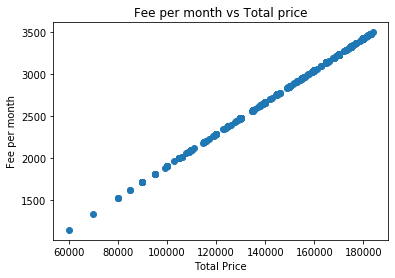

In [10]:
plt.title('Fee per month vs Total price')
plt.scatter(cars_sorted.price,cars_sorted['fee per month'])
plt.ylabel('Fee per month')
plt.xlabel('Total Price')

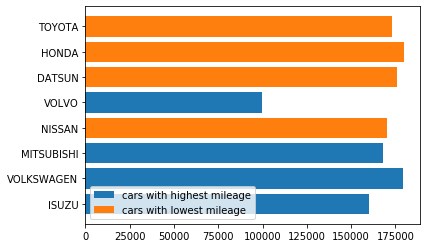

In [11]:
plt.barh(old_cars.brand, old_cars.price, label="cars with highest mileage")
plt.barh(new_cars.brand, new_cars.price, label="cars with lowest mileage")
plt.legend(loc='lower left')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f332bac54a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f332bac5ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f332bac5128>,
 'medians': [<matplotlib.lines.Line2D at 0x7f332bad2278>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f332bad25c0>,
 'means': []}

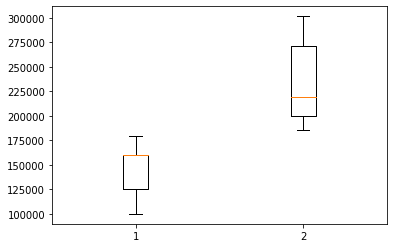

In [12]:
plt.boxplot([old_cars.price, old_cars.mileage])

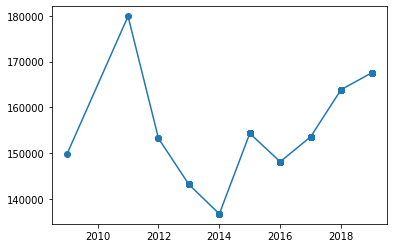

In [13]:
vw_cars = cars_df[cars_df.brand == 'VOLKSWAGEN'].sort_values('year')

sums = []
avgs = []

for year in vw_cars.year:
    x = sum(vw_cars[vw_cars.year == year].price)
    y = np.average(vw_cars[vw_cars.year == year].price)
    sums.append(x)
    avgs.append(y)

# plt.plot(vw_cars.year, sums, marker='o')
plt.plot(vw_cars.year, avgs, marker='o')